![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [16]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


# Exploratory Data Analysis

In [17]:
# Check the number of rows and columns in the dataset
print(f'Number of rows: {penguins_df.shape[0]}')
print('\n')
print(f'Number of columns: {penguins_df.shape[1]}')

Number of rows: 332


Number of columns: 5


In [18]:
# Check the number of missing values per feature
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

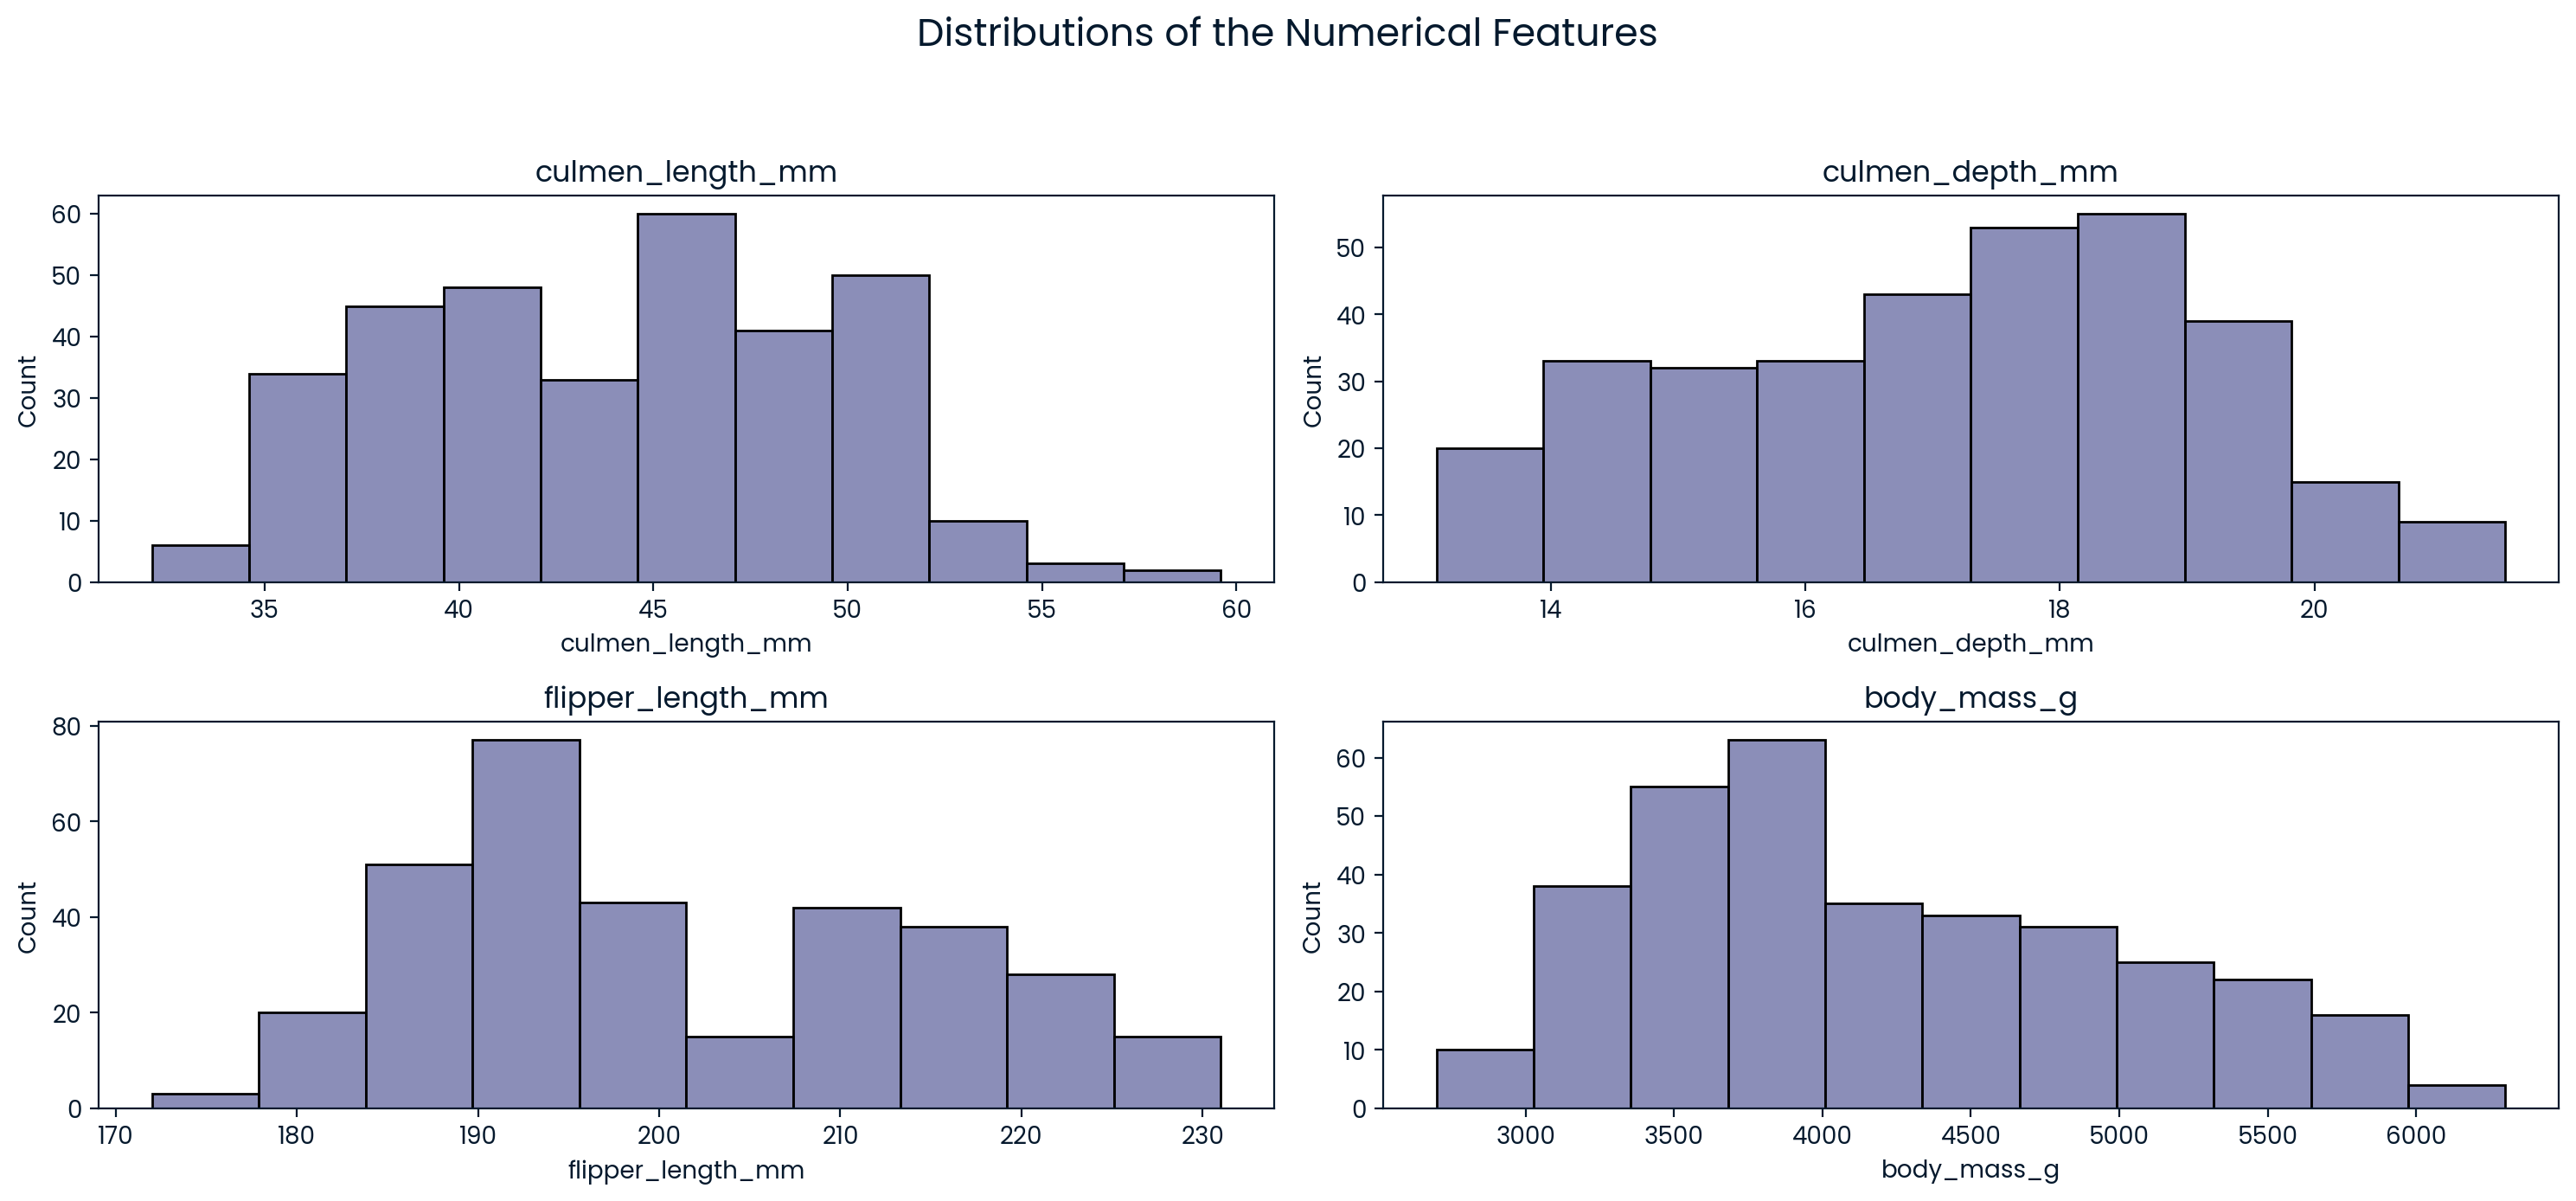

In [19]:
# Plot the distributions of the numerical features
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(penguins_df[feature], kde=False)
    plt.title(feature)
    plt.grid(False)

plt.suptitle('Distributions of the Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

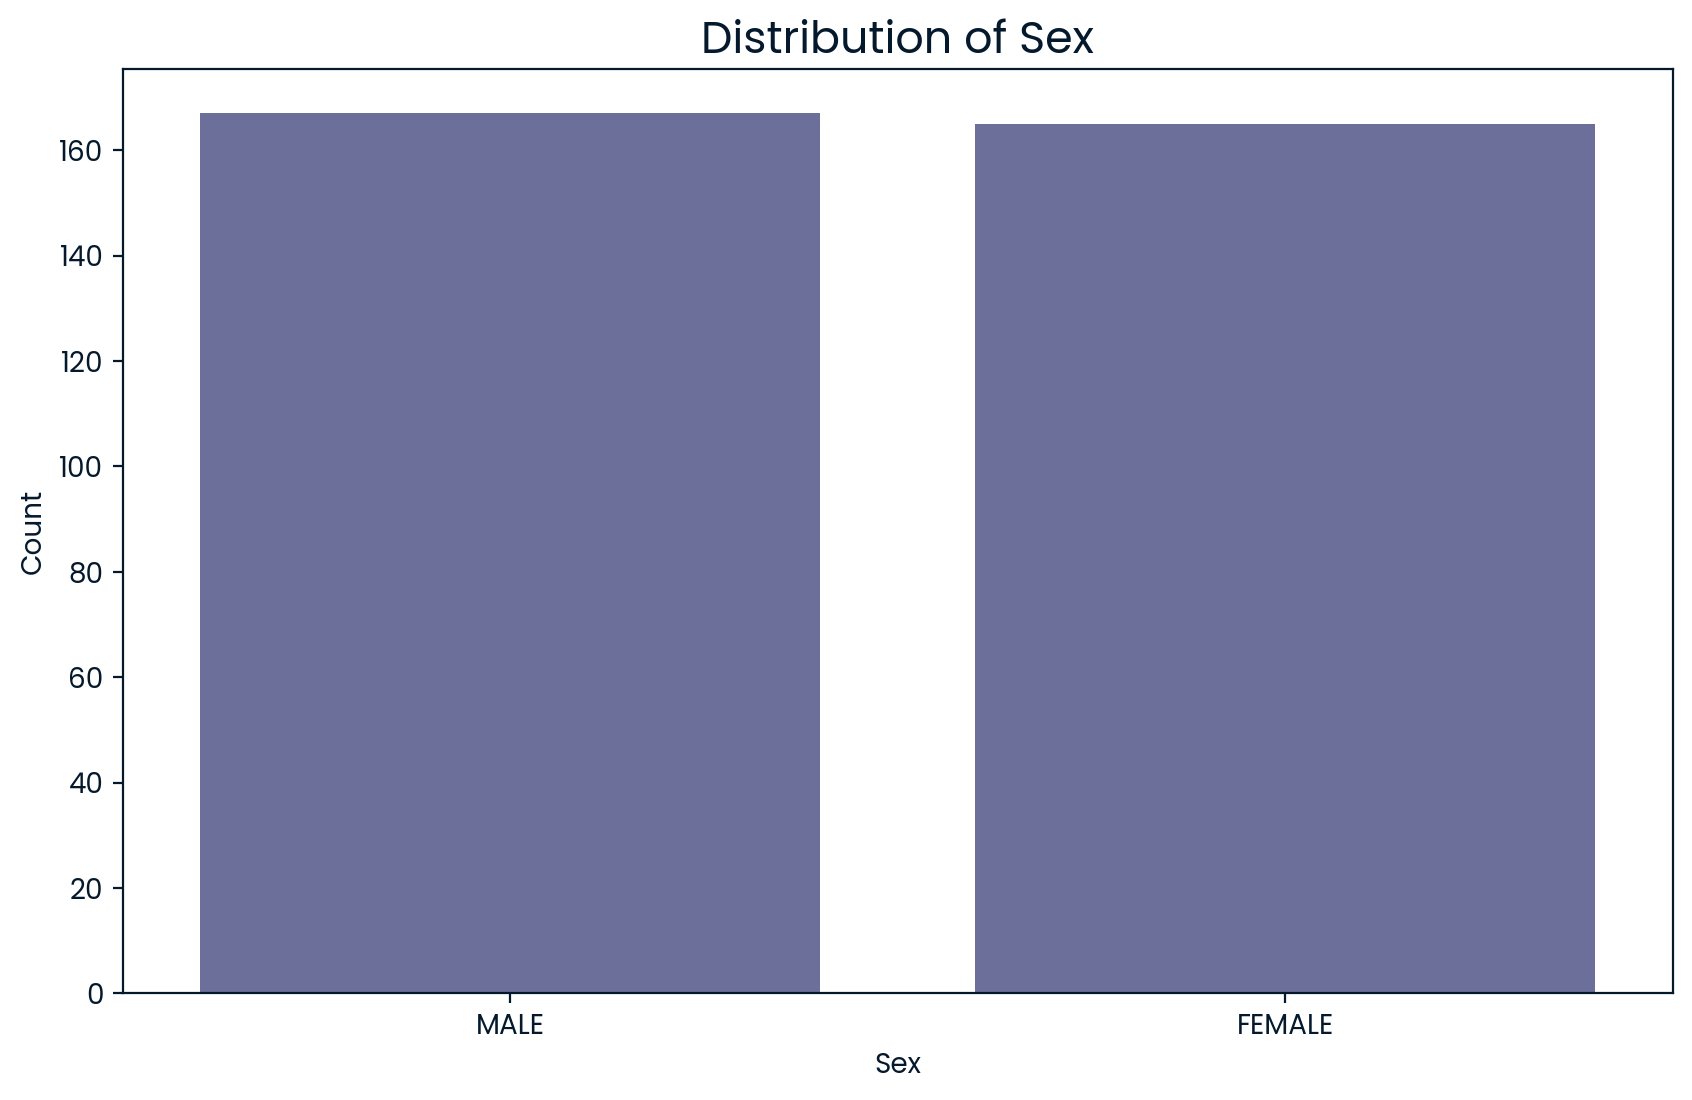

In [20]:
# Plot the distribution of the categorical feature
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='sex')
plt.title('Distribution of Sex', fontsize=16)
plt.grid(False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [21]:
# Since it's difficult to see from the plot the actual sex distribution, let's see a bit better
penguins_df['sex'].value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

# Data Preprocessing

In [22]:
# Create a dummy variable for the 'sex' feature, indicating if the penguin is MALE (1) or FEMALE(0)
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

# Confirm the success of the creation of the dummy variables
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
5,38.9,17.8,181.0,3625.0,0
6,39.2,19.6,195.0,4675.0,1
7,41.1,17.6,182.0,3200.0,0
8,38.6,21.2,191.0,3800.0,1
9,36.6,17.8,185.0,3700.0,0


In [23]:
# Initializing a MinMaxScaler object to fit and transform each numerical feature
# NOTE: Since not all of the numerical features' histograms resemble the Normal Distribution, I decided to apply the MinMaxScaler (min=0, max=1) as the scaler, instead of the StandardScaler (avg=0, std=1), which is ideal for distributions resembling the Normal Distribution
scaler = MinMaxScaler()

penguins_df[['culmen_length_mm']] = scaler.fit_transform(penguins_df[['culmen_length_mm']])
penguins_df[['culmen_depth_mm']] = scaler.fit_transform(penguins_df[['culmen_depth_mm']])
penguins_df[['flipper_length_mm']] = scaler.fit_transform(penguins_df[['flipper_length_mm']])
penguins_df[['body_mass_g']] = scaler.fit_transform(penguins_df[['body_mass_g']])

In [24]:
# Check the statistics of all features, confirming that now, for all features, their minimum is 0 and their maximum is 1
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.433494,0.482501,0.491117,0.418466,0.503012
std,0.198271,0.233366,0.237898,0.223989,0.500746
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111,0.000000
50%,0.458182,0.500000,0.423729,0.368056,1.000000
75%,0.600909,0.666667,0.694915,0.578125,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Elbow Analysis

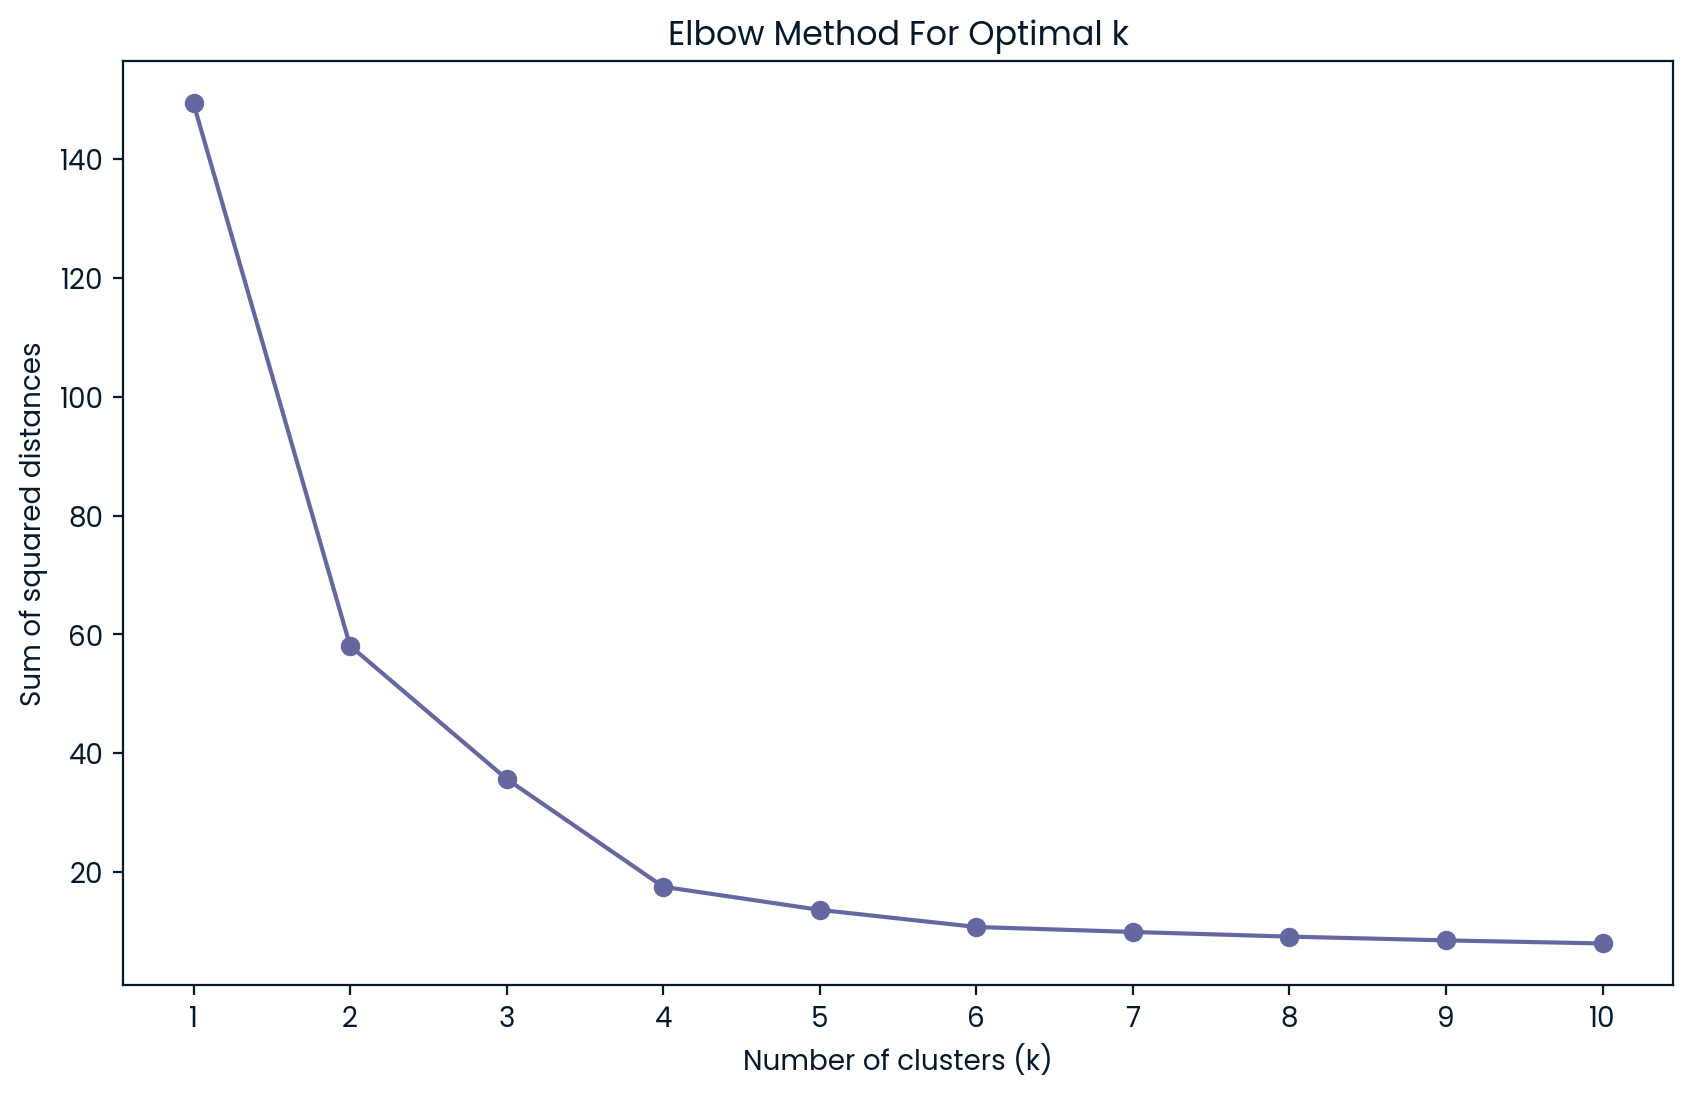

In [25]:
# List to hold the sum of squared distances for each k (number of clusters)
sse = []

# Range of k values to try
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_df)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xticks(k_values)  # Ensure x-ticks on every value of x
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Note**: According to the Elbow Method, the Sum of Squared Distances keeps decreasing significantly until the 4-clusters solution. Additionally, I was informed that there are, at least, 3 penguin species, which makes it reasonable to consider 4 clusters (species) as the optimal number of clusters.

# K-Means Clustering Algorithm

In [26]:
# Fit KMeans with the optimal number of clusters (k=4) and create a new column ('Cluster') with the assigned cluster for each penguin
kmeans = KMeans(n_clusters=4, random_state=42)
penguins_df['Cluster'] = kmeans.fit_predict(penguins_df)

In [27]:
# Show the first 10 rows of the dataset, confirming the success of the clustering algorithm
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,Cluster
0,0.254545,0.666667,0.152542,0.291667,1,0
1,0.269091,0.511905,0.237288,0.305556,0,1
2,0.298182,0.583333,0.389831,0.152778,0,1
3,0.167273,0.738095,0.355932,0.208333,0,1
4,0.261818,0.892857,0.305085,0.263889,1,0
5,0.247273,0.559524,0.152542,0.256944,0,1
6,0.258182,0.773810,0.389831,0.548611,1,0
7,0.327273,0.535714,0.169492,0.138889,0,1
8,0.236364,0.964286,0.322034,0.305556,1,0
9,0.163636,0.559524,0.220339,0.277778,0,1


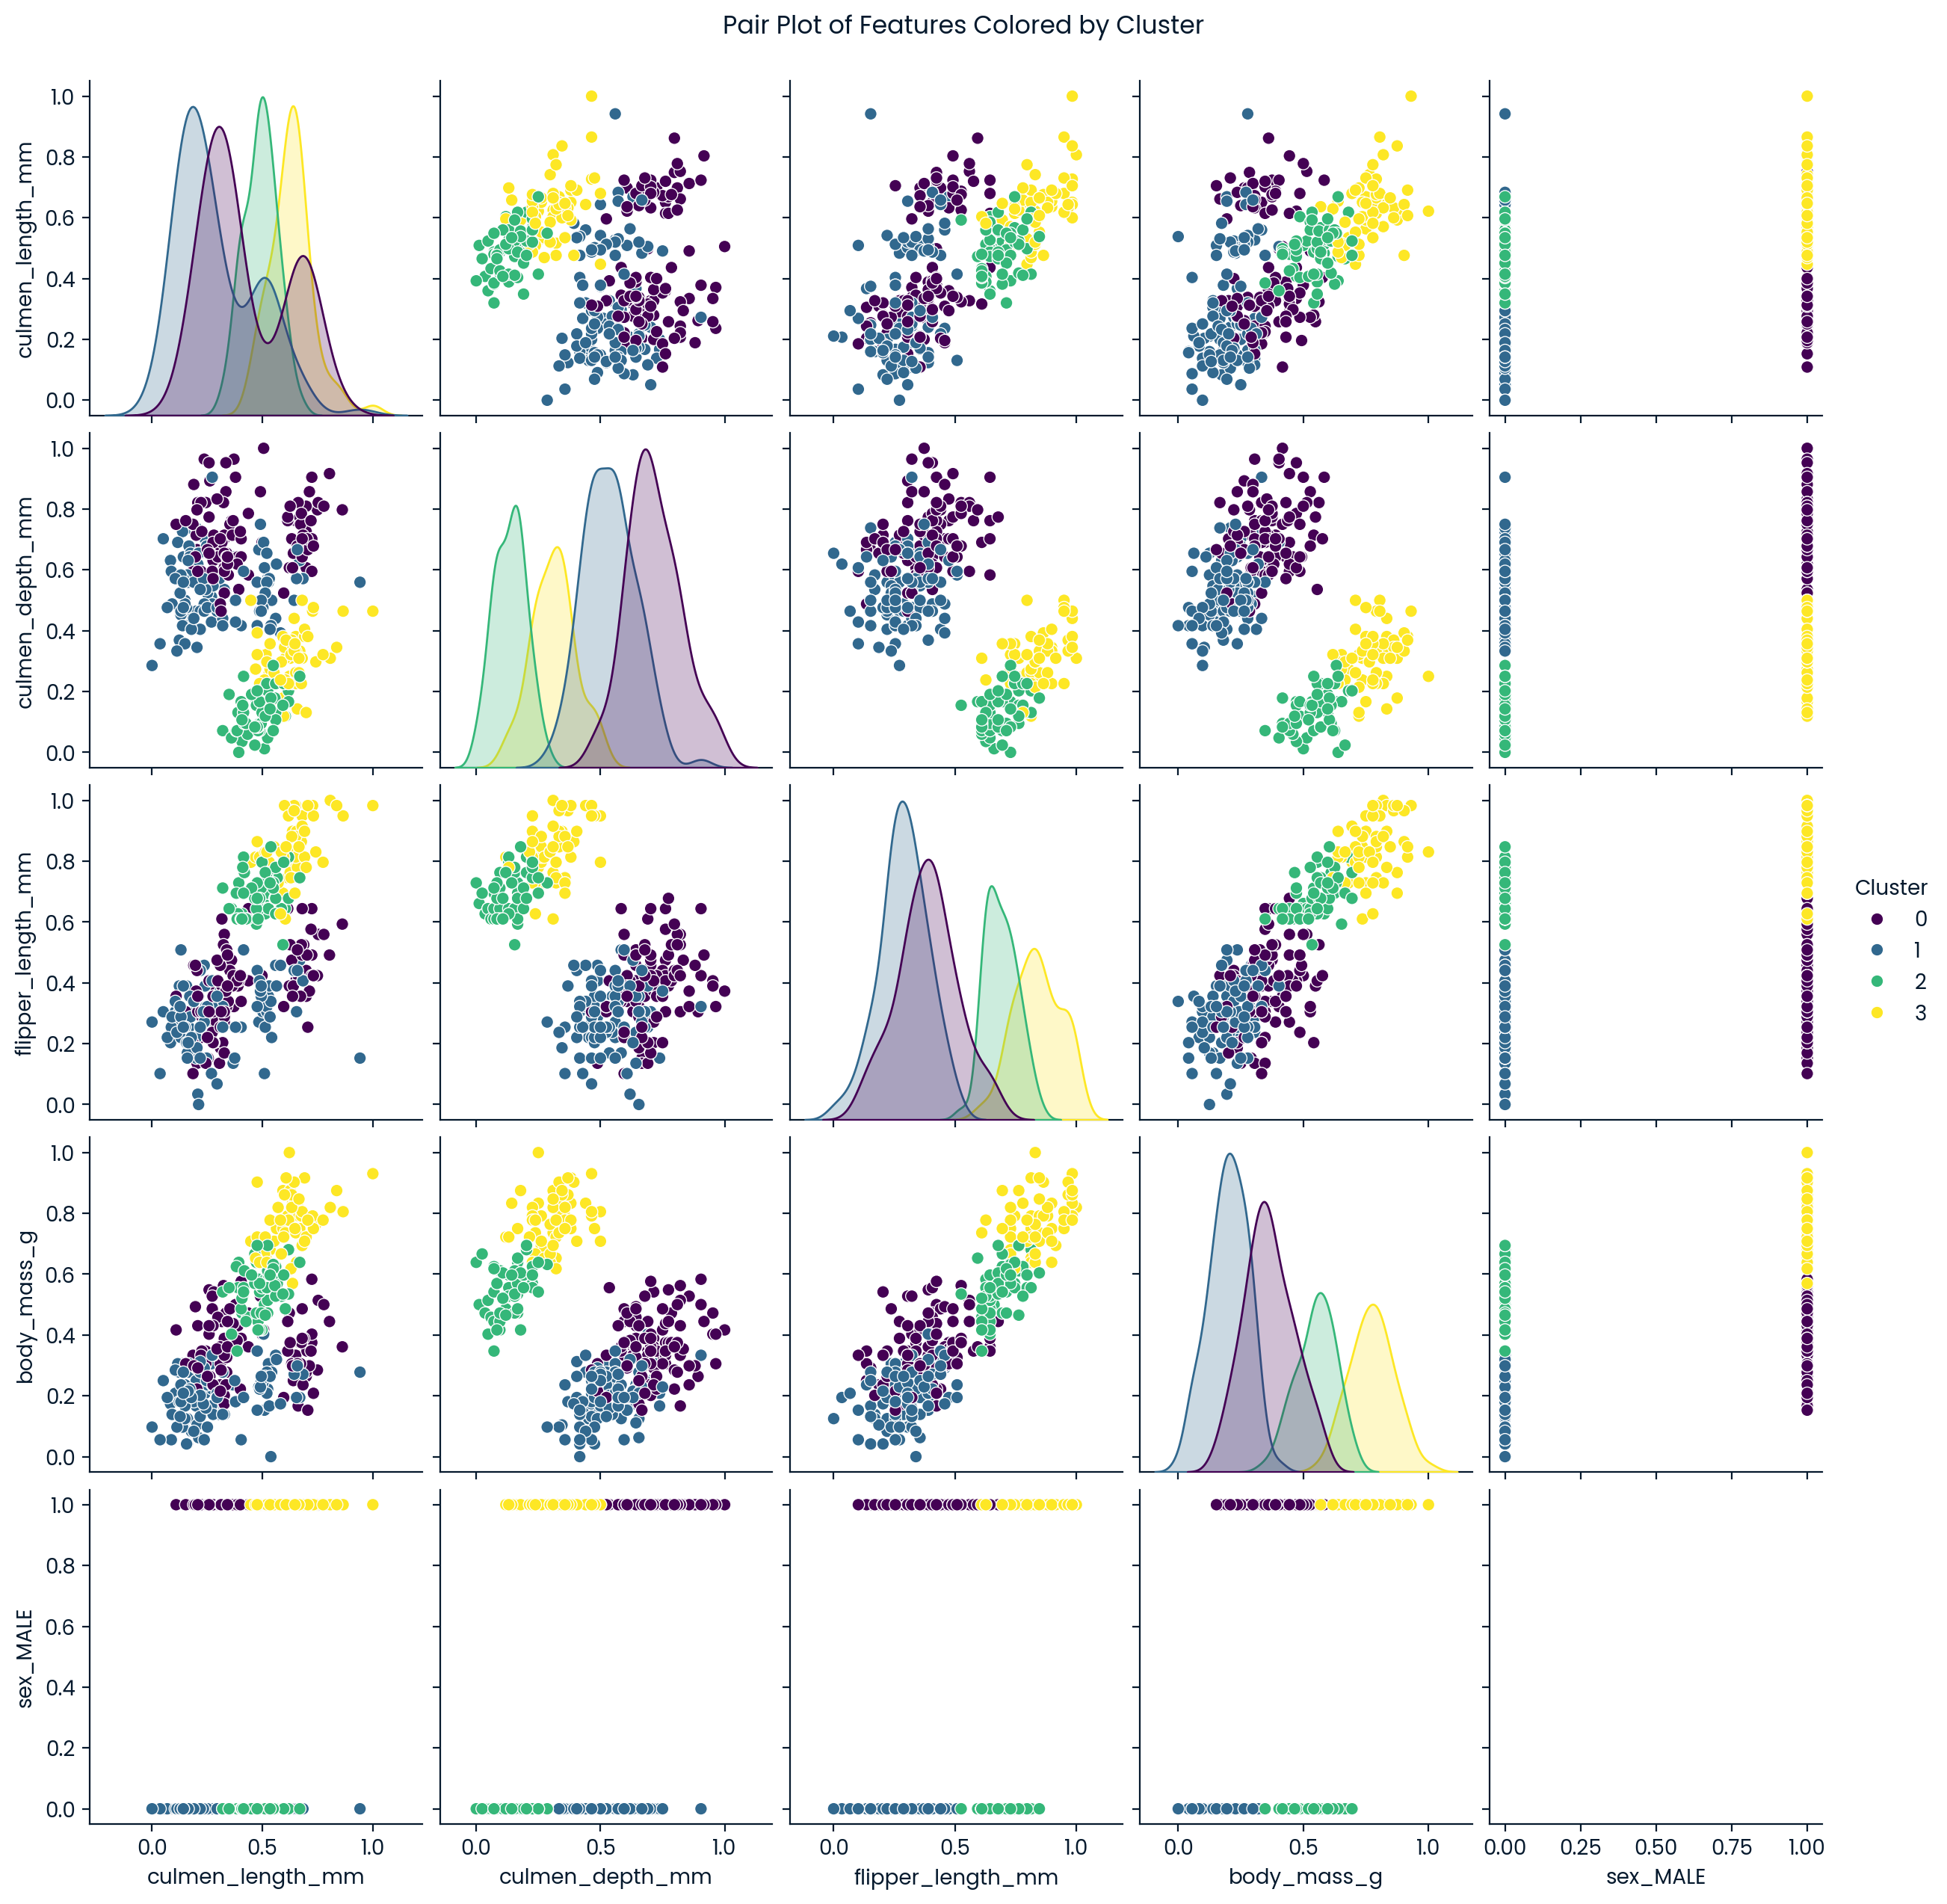

In [28]:
# Create a pair plot to visualize the features' distributions by clusters
sns.pairplot(penguins_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()

# Final Statistical DataFrame for each cluster

In [29]:
# Generate summary statistics for each cluster
stat_summary = penguins_df.groupby('Cluster').describe().transpose()

# Display the statistical summary DataFrame
print("Statistical Summary DataFrame for Each Cluster:")
stat_summary

Statistical Summary DataFrame for Each Cluster:


Cluster                           0           1          2          3
culmen_length_mm  count  106.000000  107.000000  58.000000  61.000000
                  mean     0.428302    0.295191   0.489592   0.631773
                  std      0.195226    0.181077   0.074591   0.098931
                  min      0.109091    0.000000   0.320000   0.447273
                  25%      0.276364    0.156364   0.427273   0.581818
                  50%      0.341818    0.240000   0.487273   0.632727
                  75%      0.639091    0.476364   0.537273   0.669091
                  max      0.861818    0.941818   0.669091   1.000000
culmen_depth_mm   count  106.000000  107.000000  58.000000  61.000000
                  mean     0.715633    0.537049   0.135468   0.311671
                  std      0.110648    0.106094   0.064315   0.088221
                  min      0.464286    0.285714   0.000000   0.119048
                  25%      0.642857    0.464286   0.083333   0.250000
                  50%      0.702381    0.535714   0.136905   0.309524
                  75%      0.785714    0.601190   0.178571   0.357143
                  max      1.000000    0.904762   0.285714   0.500000
flipper_length_mm count  106.000000  107.000000  58.000000  61.000000
                  mean     0.385833    0.288928   0.689947   0.839678
                  std      0.123880    0.100229   0.066065   0.096157
                  min      0.101695    0.000000   0.525424   0.610169
                  25%      0.305085    0.237288   0.644068   0.779661
                  50%      0.389831    0.288136   0.677966   0.830508
                  75%      0.457627    0.355932   0.728814   0.898305
                  max      0.677966    0.508475   0.847458   1.000000
body_mass_g       count  106.000000  107.000000  58.000000  61.000000
                  mean     0.362945    0.199766   0.549928   0.773566
                  std      0.098070    0.078629   0.078216   0.086988
                  min      0.152778    0.000000   0.347222   0.569444
                  25%      0.298611    0.145833   0.489583   0.722222
                  50%      0.350694    0.208333   0.555556   0.777778
                  75%      0.430556    0.260417   0.604167   0.833333
                  max      0.583333    0.402778   0.694444   1.000000
sex_MALE          count  106.000000  107.000000  58.000000  61.000000
                  mean     1.000000    0.000000   0.000000   1.000000
                  std      0.000000    0.000000   0.000000   0.000000
                  min      1.000000    0.000000   0.000000   1.000000
                  25%      1.000000    0.000000   0.000000   1.000000
                  50%      1.000000    0.000000   0.000000   1.000000
                  75%      1.000000    0.000000   0.000000   1.000000
                  max      1.000000    0.000000   0.000000   1.000000

In [30]:
# Generate a characteristic DataFrame using groupby and mean
stat_penguins = penguins_df.groupby('Cluster').mean()

# Display the characteristic DataFrame
print("\nCharacteristic DataFrame for Each Cluster:")
stat_penguins


Characteristic DataFrame for Each Cluster:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
Cluster,,,,,
0,0.428302,0.715633,0.385833,0.362945,1.0
1,0.295191,0.537049,0.288928,0.199766,0.0
2,0.489592,0.135468,0.689947,0.549928,0.0
3,0.631773,0.311671,0.839678,0.773566,1.0
